Example Notebook
============

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
basedir = '../'
sys.path.append(basedir)

from lda_for_fragments import Ms2Lda
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import sys
import visualisation.pyLDAvis as pyLDAvis

In [ ]:
n_topics = 300 # number of topics, around 300-400 seems to be good from cross-validation
n_samples = 200 # how many samples to get during Gibbs sampling

n_burn = 0 # no. of burn-in samples to discard, unused
n_thin = 1 # thinning parameter, unused

# follow the recommendation from Griffith & Styver
alpha = 50.0/n_topics # hyper-parameter for document-topic distributions
beta = 0.1 # hyper-parameter for topic-word distributions

fragment_filename = basedir + 'input/relative_intensities/Beer_3_T10_POS_fragments_rel.csv'
neutral_loss_filename = basedir + 'input/relative_intensities/Beer_3_T10_POS_losses_rel.csv'
mzdiff_filename = None

ms1_filename = basedir + 'input/relative_intensities/Beer_3_T10_POS_ms1_rel.csv'
ms2_filename = basedir + 'input/relative_intensities/Beer_3_T10_POS_ms2_rel.csv'

In [ ]:
ms2lda = Ms2Lda(fragment_filename, neutral_loss_filename, mzdiff_filename, 
                ms1_filename, ms2_filename, relative_intensity=True)
df, vocab = ms2lda.preprocess()

In [ ]:
ms2lda.run_lda(df, vocab, n_topics, n_samples, n_burn, n_thin, 
               alpha, beta, use_own_model=True, use_native=True)

In [ ]:
ms2lda.write_results('beer3_pos_rel')

In [ ]:
ms2lda.model.print_topic_words()

2. Shared Fragments within a Topic
--------------------------------------

If the 'interactive' parameter below is True, we will show an interactive visualisation of the results in a separate tab. You need to interrupt the kernel to stop it once you're done with it (from the menu above, Kernel > Interrupt).

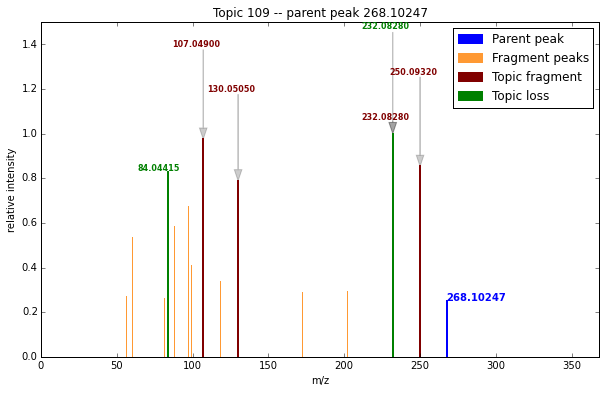

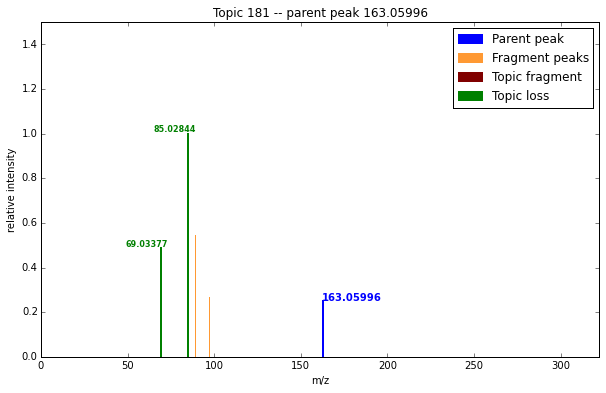

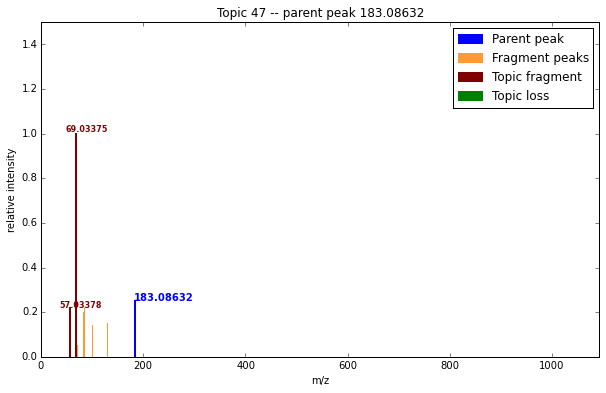

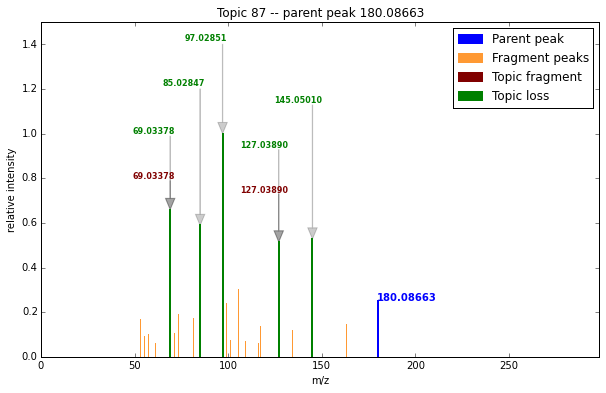

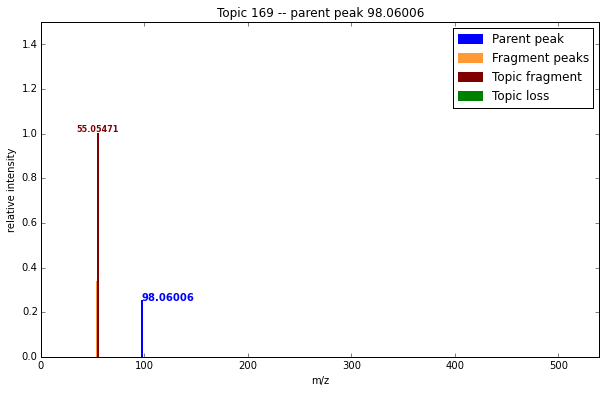

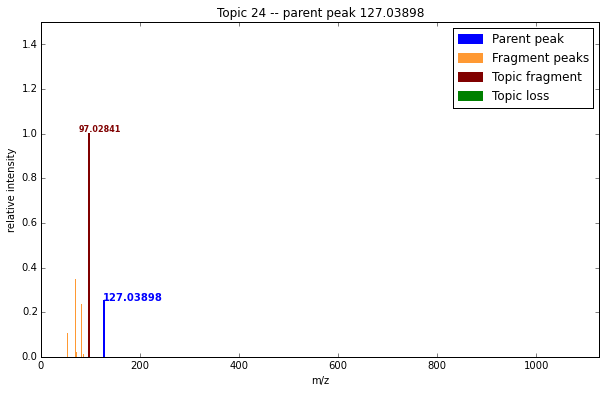

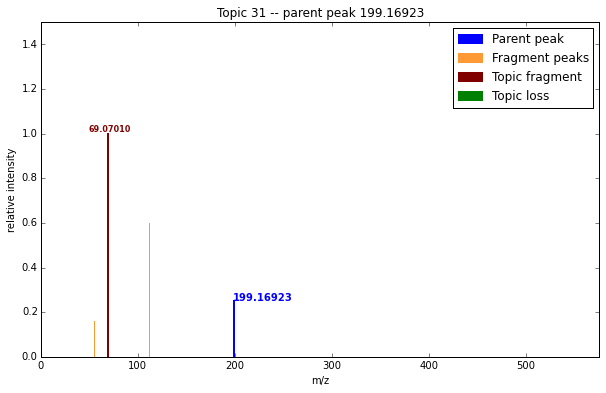

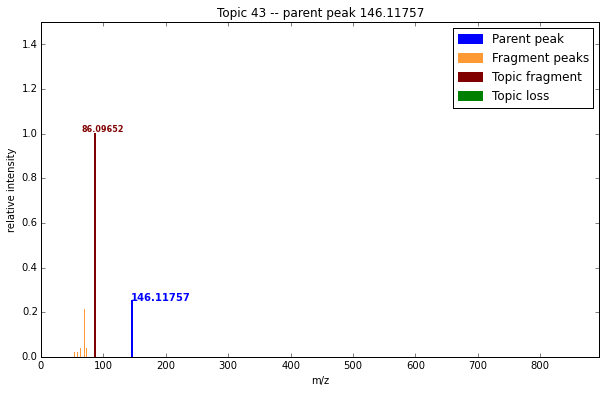

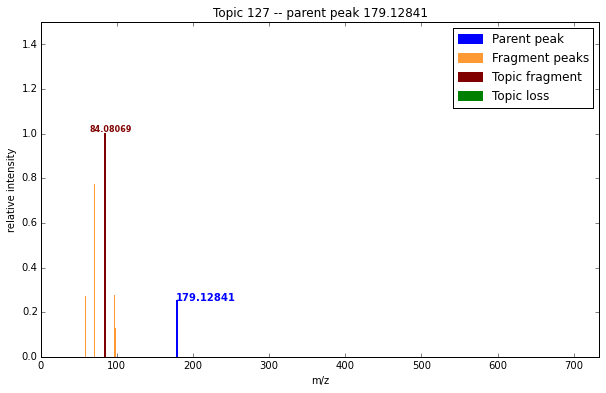

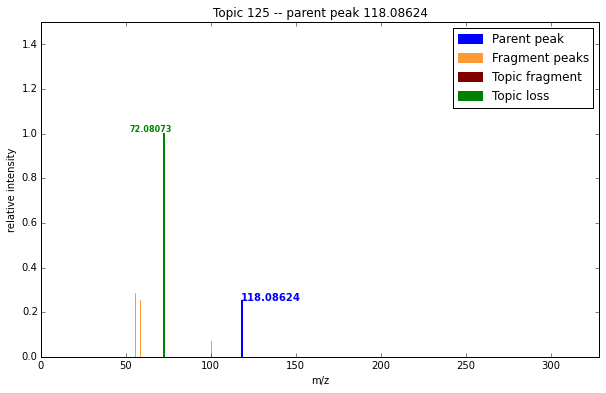

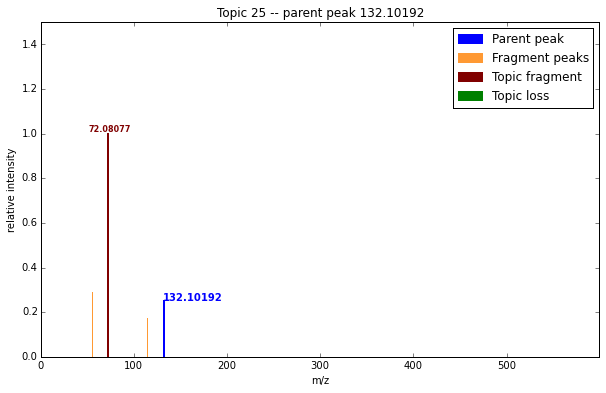

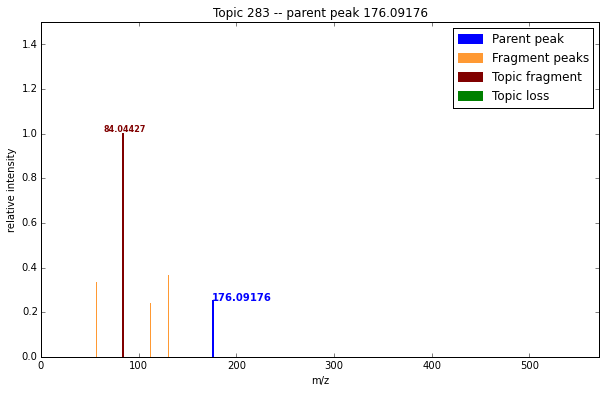

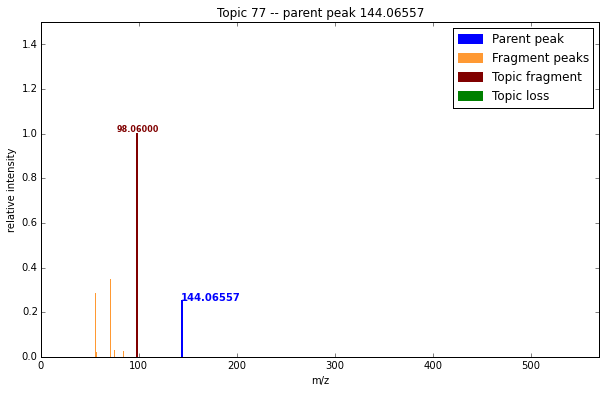

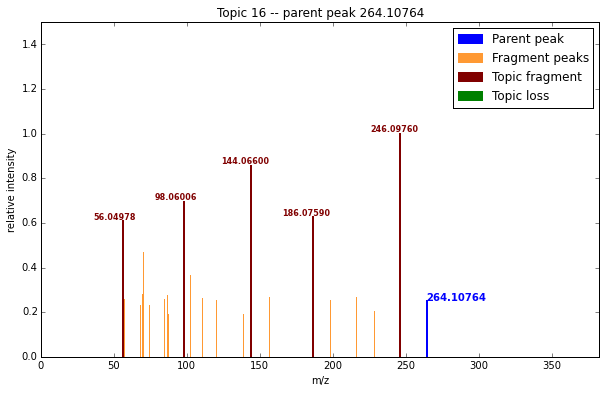

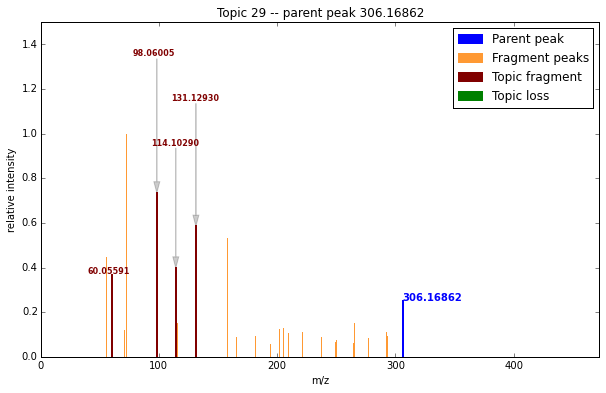

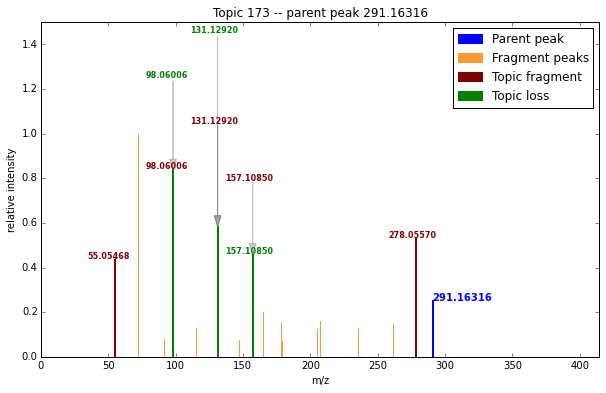

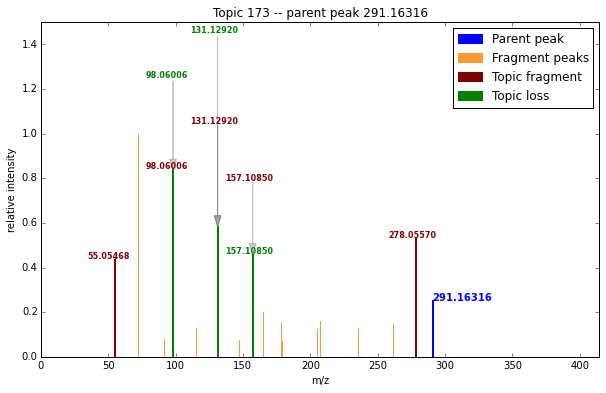

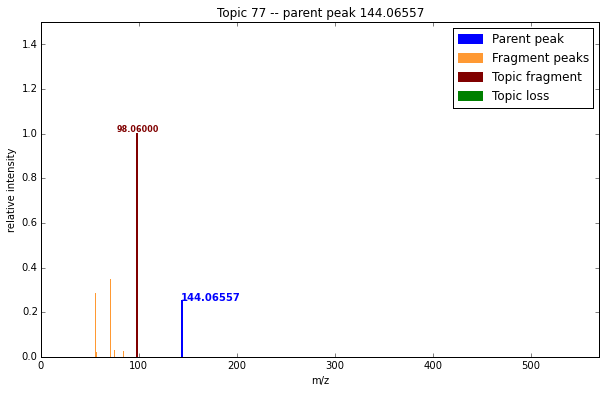

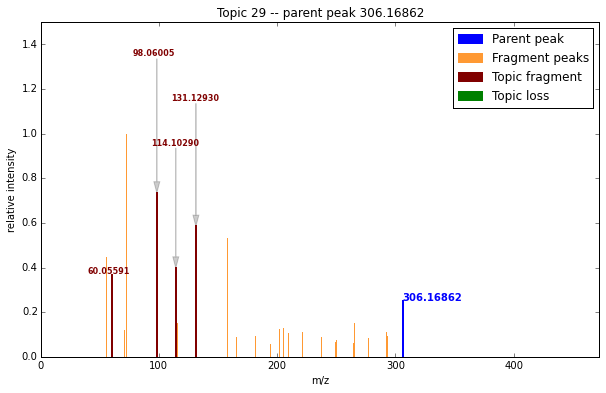

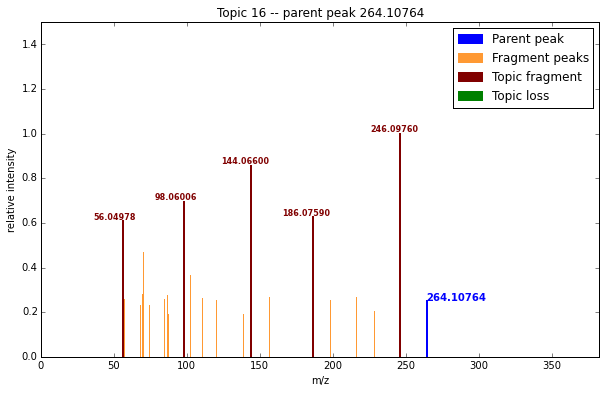

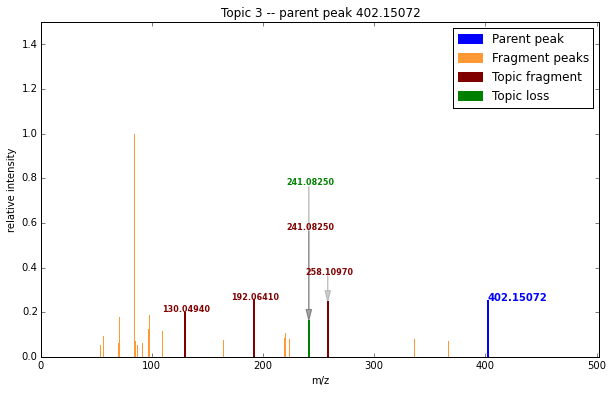

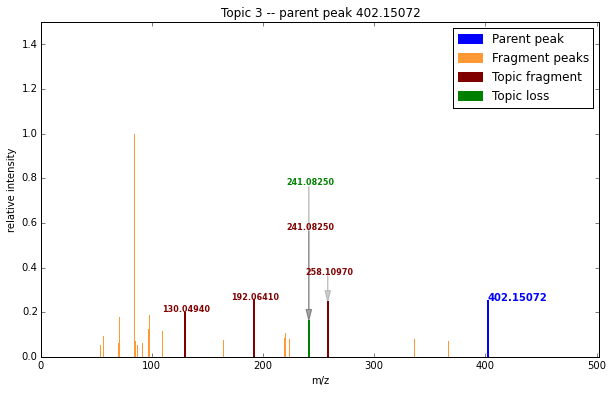

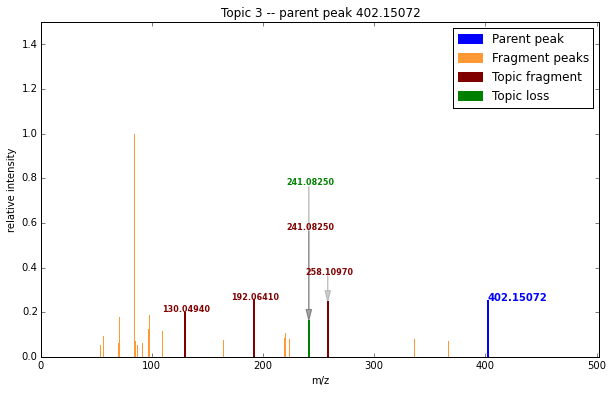

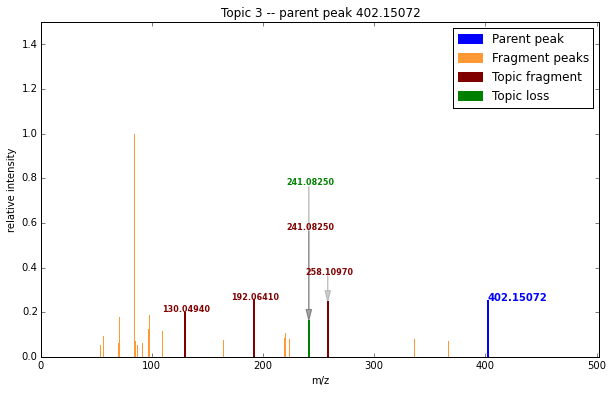

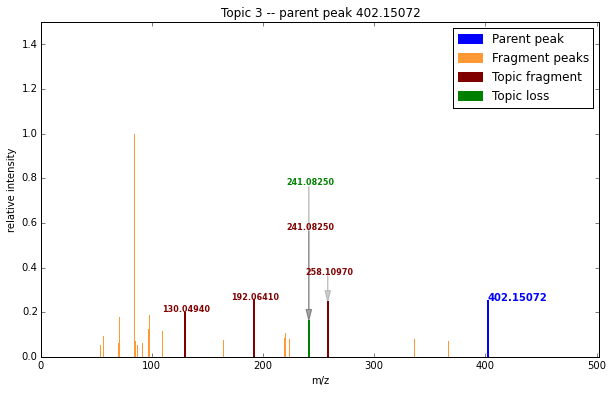

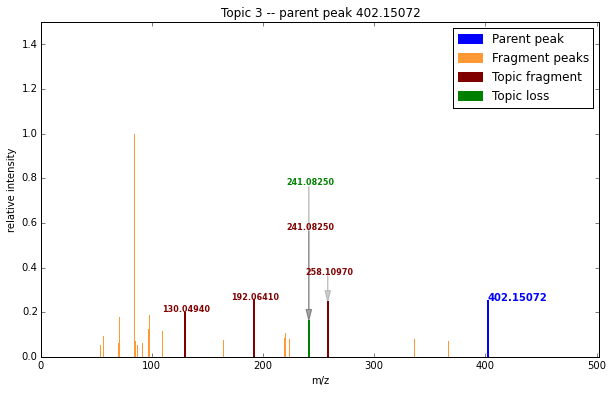

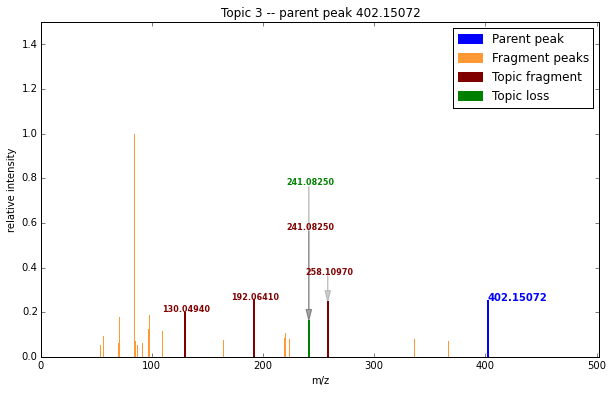

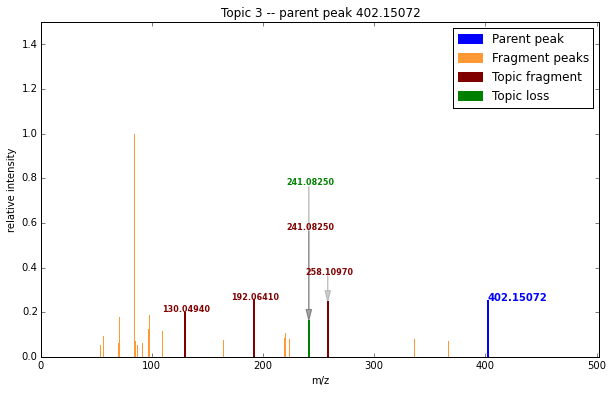

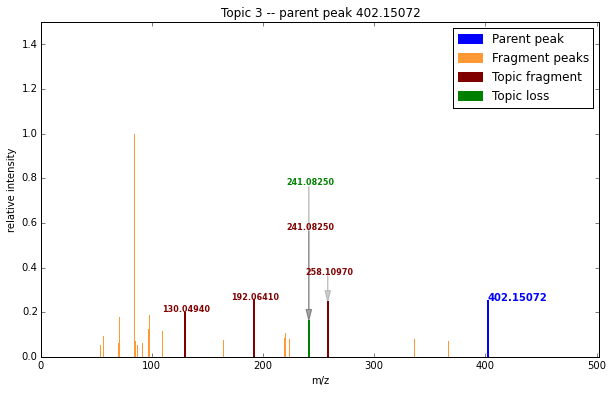

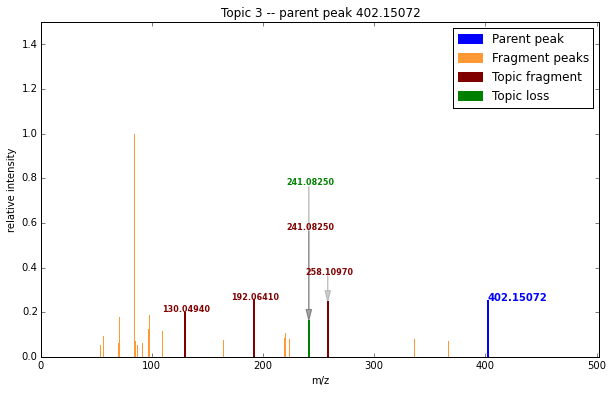

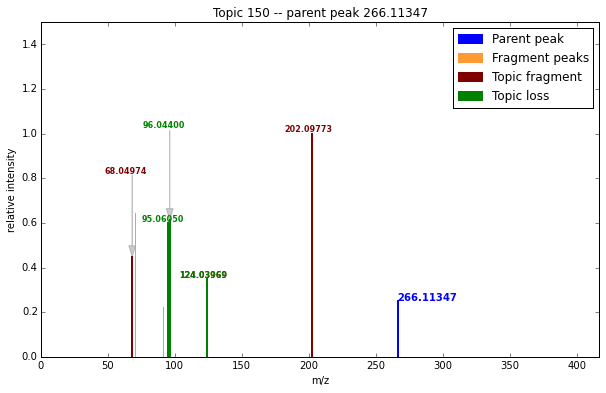

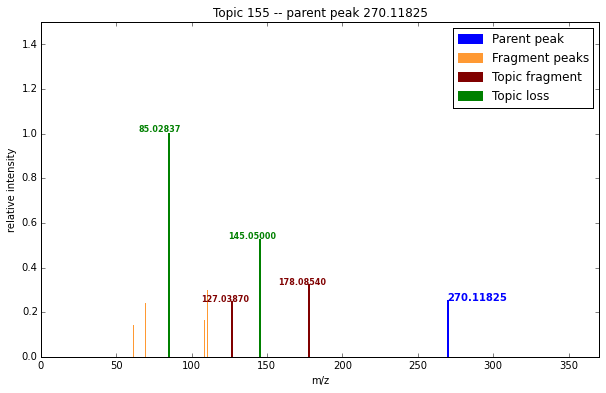

In [ ]:
ms2lda.plot_lda_fragments(consistency=0.50, sort_by="h_index", interactive=True)
# ms2lda.plot_lda_fragments(consistency=0.50, sort_by="in_degree")